In [793]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d
from math import *
import sympy as sp
sp.init_printing(use_unicode=True)

# Question 1

# (a)

In [794]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [795]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [796]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [797]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    0   1      1
1    1   1      1
2    0   1      1
3    1   1      1
4    1   1      1
..  ..  ..    ...
95   0   0      1
96   0   1      1
97   1   0      1
98   1   1      1
99   0   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   1      2
1    0   0      2
2    0   0      2
3    1   0      2
4    0   0      2
..  ..  ..    ...
95   1   0      2
96   1   0      2
97   1   0      2
98   1   0      2
99   1   0      2

[100 rows x 3 columns]


In [798]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [799]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [800]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [801]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.5  0.82]


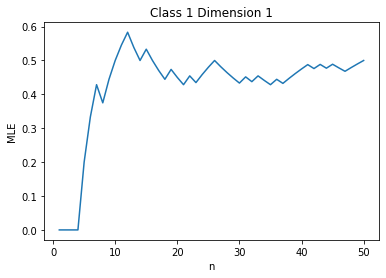

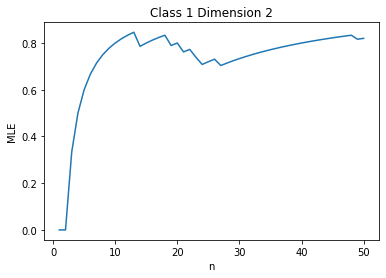

In [802]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [803]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [804]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.9  0.26]


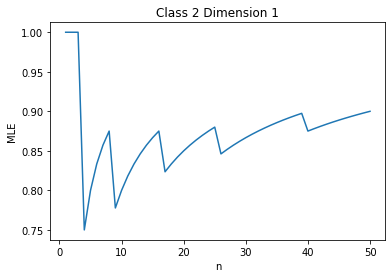

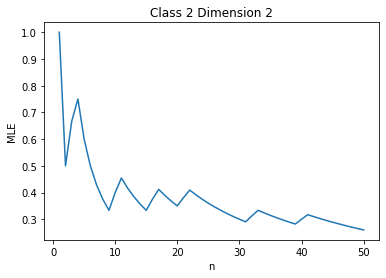

In [805]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

Yes, the final answer matches the theoretically calculated values.

# (d)

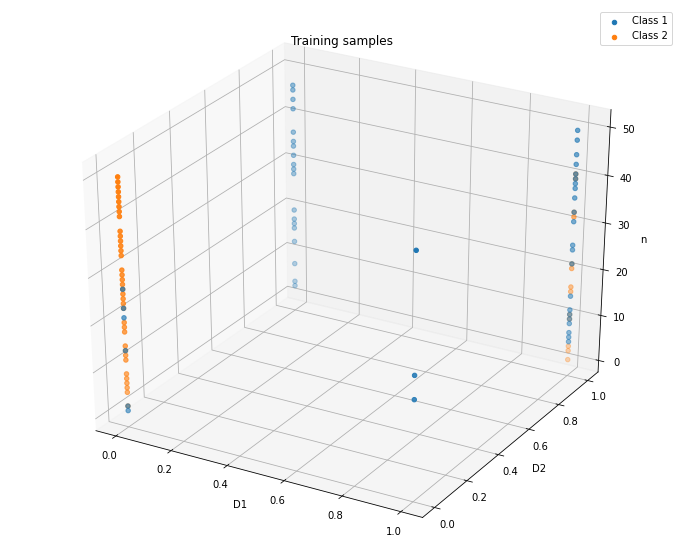

In [806]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('Training samples')
plt.legend()
plt.show()


# (e)

In [807]:
def discriminant(mu11, mu12, mu21, mu22, x1, x2):
  d1 = np.log(pow(mu11, x1)*pow(1-mu11, 1-x1)*pow(mu12, x2)*pow(1-mu12, 1-x2))
  d2 = np.log(pow(mu21, x1)*pow(1-mu21, 1-x1)*pow(mu22, x2)*pow(1-mu22, 1-x2))
  if d1>=d2:
    return 1
  else:
    return 2

In [808]:
X_test1_f1 = X_test1['f1'].tolist()
X_test1_f2 = X_test1['f2'].tolist()
pred1 = []
for i in range(50):
  d = discriminant(u11_mle, u12_mle, u21_mle, u22_mle, X_test1_f1[i], X_test1_f2[i])
  pred1.append(d)

In [809]:
X_test2_f1 = X_test2['f1'].tolist()
X_test2_f2 = X_test2['f2'].tolist()
pred2 = []
for i in range(50):
  d = discriminant(u11_mle, u12_mle, u21_mle, u22_mle, X_test2_f1[i], X_test2_f2[i])
  pred2.append(d)

In [810]:
num1 = 0
num2 = 0

for i in range(50):
  if pred1[i]==1:
    num1 += 1
  if pred2[i]==2:
    num2 += 1

print('Number of samples correctly classified in class 1')
print(num1)
print('Number of samples correctly classified in class 2')
print(num2)

Number of samples correctly classified in class 1
48
Number of samples correctly classified in class 2
40


# Question 3

# (c)

In [647]:
X = np.array([[2,4],[6,8]])
mu = np.array([[3],[7]])

print('X')
print(X)

print()

print('Mean')
print(mu)

X
[[2 4]
 [6 8]]

Mean
[[3]
 [7]]


In [648]:
Xc = np.array([[-1,1],[-1,1]])
print('Centralised X')
print(Xc)

Centralised X
[[-1  1]
 [-1  1]]


In [649]:
S = 0.5*(np.dot(Xc,np.transpose(Xc)))
print('The covariance')
print(S)

The covariance
[[1. 1.]
 [1. 1.]]


In [650]:
e1, e2 = np.linalg.eig(S)

print('Eigenvalue 1')
print(e1[0])
print('Eigenvalue 2')
print(e1[1])

print()
print('The eigenvectors are')

print('       1           2')
print(e2)

Eigenvalue 1
2.0
Eigenvalue 2
0.0

The eigenvectors are
       1           2
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [651]:
U = e2

In [652]:
print('U')
print(U)

U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [653]:
U1 = U[:,:1]

In [654]:
Y = np.dot(np.transpose(U1),Xc)
print('Y')
print(Y)

Y
[[-1.41421356  1.41421356]]


In [655]:
X_ = np.dot(U1,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-1.  1.]
 [-1.  1.]]

After adding mean
[[2. 4.]
 [6. 8.]]


In [656]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  0.0


In [657]:
Y = np.dot(np.transpose(U),Xc)
print('Y')
print(Y)

Y
[[-1.41421356  1.41421356]
 [ 0.          0.        ]]


In [658]:
X_ = np.dot(U,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-1.  1.]
 [-1.  1.]]

After adding mean
[[2. 4.]
 [6. 8.]]


In [659]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  0.0


# (d)

In [660]:
d = 3
N = 100
mu = np.array([66, 60, 60])
sigma = np.array([[630, 450, 225], [450, 450, 0], [225, 0, 900]])
X = np.random.multivariate_normal(mu, sigma, N)
X = X.T
X

array([[ 73.93441804,  85.16765732,  76.15230126,  39.55590336,
        155.46924046,  55.96264678,  42.26586235,  82.89807274,
         90.86061282,  39.69170461,  26.47381514,  26.290533  ,
         94.99844614,  61.60707603,  68.23593562,  79.33503196,
         65.30929018,  77.08814893,  43.71792524,  68.87485038,
         71.4297815 , 105.62479094,  84.56360601,  68.5834683 ,
         55.18736812, 113.0887919 ,  63.06716382, 118.61414722,
         56.40626526,  26.13190353,  62.97946591,  86.18318866,
        105.27107568,  59.26194741,  85.87994391,  46.32227538,
         48.17425298,  89.42472603,  81.95061371,  66.87706867,
         50.34426544,  58.02801974,  52.3095601 , 114.85469019,
         16.14127456,  95.12820121,  38.56003034,  52.19849096,
        101.45913139,  92.07499279, 108.40359435,  71.98278121,
         89.02037731,  65.41691158,  74.44871527, 115.29492758,
         69.52942534,  69.57295801,  56.43511375,  47.9129376 ,
         99.47870316,  36.90114858,  66.

# (e)

In [661]:
Xc = np.empty((d,N))
for i in range(d):
  for j in range(N):
    Xc[i][j] = X[i][j]-mu[i]

print('Xc = ', Xc)

S = np.cov(Xc)
print('S = ', S)

eigenValues, eigenVectors = np.linalg.eig(S)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print('Eigenvalues = ',eigenValues)
print('U = ', eigenVectors)

Xc =  [[  7.93441804  19.16765732  10.15230126 -26.44409664  89.46924046
  -10.03735322 -23.73413765  16.89807274  24.86061282 -26.30829539
  -39.52618486 -39.709467    28.99844614  -4.39292397   2.23593562
   13.33503196  -0.69070982  11.08814893 -22.28207476   2.87485038
    5.4297815   39.62479094  18.56360601   2.5834683  -10.81263188
   47.0887919   -2.93283618  52.61414722  -9.59373474 -39.86809647
   -3.02053409  20.18318866  39.27107568  -6.73805259  19.87994391
  -19.67772462 -17.82574702  23.42472603  15.95061371   0.87706867
  -15.65573456  -7.97198026 -13.6904399   48.85469019 -49.85872544
   29.12820121 -27.43996966 -13.80150904  35.45913139  26.07499279
   42.40359435   5.98278121  23.02037731  -0.58308842   8.44871527
   49.29492758   3.52942534   3.57295801  -9.56488625 -18.0870624
   33.47870316 -29.09885142   0.53081897  -0.29159455 -20.47953435
   23.09208564   4.86515788  -4.14162878  11.02499342  -9.12102743
  -42.50274922  14.3532551   -6.46696458   3.69087714  17

# (f)

In [662]:
def computeMSE(X1, X2, ro, col):
  mse = np.square(np.subtract(X1, X2))
  mse = np.mean(mse)
  return mse

In [663]:
def computeY(U,xc,p):
  U = U[:,:p]
  # print('UUUU = ', U)
  Y = np.dot(np.transpose(U),xc)
  return Y

In [664]:
def computeFinalX(u,y,mean,p,d,N):
  u = u[:,:p]
  x = np.dot(u,y)
  # print(x)
  for i in range(d):
    for j in range(N):
      x[i][j] += mean[i]
  return x

In [665]:
Y = computeY(eigenVectors,Xc,d)
print(Y)
X_ = computeFinalX(eigenVectors,Y,mu,d,d,N)
print(X_)
mse = computeMSE(X_,X,d,N)
print(mse)

[[ 8.49186336e+00 -1.37720252e+01 -1.58632802e+01  3.99280845e+01
  -5.90204467e+01  1.40575549e+01  2.08110177e+01 -5.54216156e+01
  -3.33937280e+01 -7.84562308e+00  6.48968367e+01  8.97215026e+01
  -3.59945283e+01  4.56134547e+00 -1.80748720e+01 -4.41186744e+01
   2.51682477e+00 -4.75400807e+01  3.62373539e+00  5.90746375e+00
   2.36538733e+01 -6.49367986e+01 -3.45120766e+01  7.07399142e+00
   3.03932556e+00 -6.26174258e+01  3.33334815e+00 -8.76963064e+01
   2.83099679e+00  5.07886213e+01 -1.32486606e+01 -8.79297595e+01
  -1.00687675e+01  1.76397294e+01  4.42071837e+00  2.55527717e+01
   1.74830778e+01 -5.02550965e+01 -2.24083912e+01  1.73519262e+01
   2.24116758e+01  1.01383539e+01  6.28197000e+01 -6.98207331e+01
   1.97895513e+01 -1.55580384e+01  4.13933984e+01  3.01942419e+01
  -8.72288413e+01 -4.73146478e+01 -7.39174482e+00 -1.12176171e+01
  -2.04389489e+01 -7.61924069e+00 -7.91955319e+00 -6.83415451e+01
   2.12468578e+01 -7.26352466e+00  6.32913250e-01  1.69682930e+01
  -2.58996

# (g)

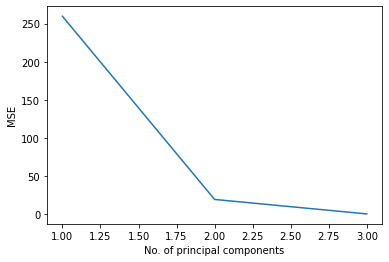

In [666]:
x_axis = []
y_axis = []

for i in range(min(d,N)):
  x_axis.append(i+1)
  Y = computeY(eigenVectors,Xc,i+1)
  X_ = computeFinalX(eigenVectors,Y,mu,i+1,d,N)
  mse = computeMSE(X_,X,i+1,N)
  y_axis.append(mse)

plt.plot(x_axis, y_axis)
plt.xlabel('No. of principal components')
plt.ylabel('MSE')
plt.show()